In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [2]:
plt.rcParams.update({'font.size': 12})

Create datsaets of CO$_2$ concentrations, and two logarithmic climate sensitivities as a function of those CO$_2$ concentrations. The lower sensitivity is the short-term of "transient" one, or what the temperature change is that occurs as a given CO$_2$ concentrations is first reached. The higher sensitivity is the long-term or "equilibrium" one, after the ocean has had a long time to take up enough heat and stabilize the temperature for a given CO$_2$ concentration.

In [3]:
concs = xr.DataArray(np.arange(180.,650,1), coords={'CO$_2$ concentration (ppm)':np.arange(180.,650,1)})
twoxco2 = np.abs(concs-280.*2).argmin()

temp1 = 3.*np.log(concs/280.)
temp2 = 5.*np.log(concs/280.)

nowco2 = np.abs(concs-420.).argmin()

Make a diagram of how the temperature and CO$_2$ change under zero CO$_2$ emissions, showing how CO$_2$ concentrations decrease in a way that roughly cancels the increased sensitivity over time. Compare this to the case where CO$_2$ concentrations remain constant after reaching their peak, which requires continuing CO$_2$ emissions, and which leads to long-term warming.

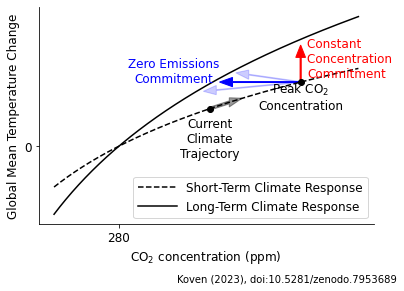

In [4]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic.png',dpi=300, bbox_inches='tight')

#### On 5/21/2023, I posted a thread about this to twitter, at https://twitter.com/cdkoven/status/1660275241451675648  I paste below the text of the thread:
    
I was recently chatting with an old friend about net zero, and ended up gesticulating something like this to try to explain how temperature can stabilize after zero emissions, even though climate sensitivity increases over time. So I thought I'd try to draw as a schematic.

The idea that there should be roughly constant global temperatures after net zero is a difficult one, which lots of people keep getting stuck on, as @chrisd_jones points out. https://twitter.com/chrisd_jones/status/1659903423657984000

To me, the simplest way to explain it is to think about a short-term and a long-term sensitivity of global warming for a given CO$_2$ level, which are drawn here as the two curves in the diagram. Their curvature means that each doubling of CO$_2$ leads to a constant amount of warming.

The long-term (solid) curve is higher than the short-term (dashed) one because the ocean has an enormous heat capacity, and so it takes centuries to respond fully to the warming for a given CO$_2$ concentration. Eventually we are committed to go towards the long-term solid curve.

Currently we are on the short-term dashed curve. Since we are rapidly causing CO$_2$ to go up by burning fossil fuels, the climate is warming. So we are moving upwards and to the right in the diagram, along the grey arrow.

If we mitigate CO$_2$ emissions strongly enough, we will reach a point where CO$_2$ concentrations stop going up. Instead of moving along the short-term (dashed) curve, the climate is committed to slowly drift to the long-term (solid) curve. But there are two ways of getting there.

If CO$_2$ concentrations remain constant, then the climate will continue to warm, following the red arrow. But because of land and ocean carbon sinks, a constant CO$_2$ concentration requires positive CO2 emissions, not zero emissions.

If we get to zero emissions, we will instead go from right to left along one of the blue arrows between the two curves, with much less temperature change because CO$_2$ concentrations will decrease. This is because carbon sinks persist after net zero, though they weaken with time.

The cancellation between carbon sinks and increasing climate sensitivity over time is only approximate (we may follow a light-blue arrow rather than the dark-blue one), but according to climate models, the key commitment is to move leftwards rather than upwards after net zero.

Anyway, this way of visualizing the problem helps me to think about it. So I sketched it out in a jupyter notebook and posted to GitHub. And apologies in advance if someone else has already diagrammed it like this.



#### Below are partially-drawn versions of the above figure for animating furing a talk.

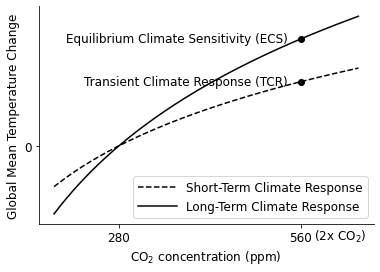

In [5]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280., 560.])
ax.set_ylabel('Global Mean Temperature Change')

plt.text(560+20,-2.94, '(2x CO$_2$)',wrap=False, ha='left', va='center')


plt.plot(560,temp1[twoxco2], 'o', c='black') 
plt.text(560-20,temp1[twoxco2], 'Transient Climate Response (TCR)',wrap=True, ha='right', va='center')

plt.plot(560,temp2[twoxco2], 'o', c='black') 
plt.text(560-20,temp2[twoxco2], 'Equilibrium Climate Sensitivity (ECS)',wrap=True, ha='right', va='center')

#plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
#plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

#plt.plot(560,temp1[twoxco2], 'o', c='black') 

#plt.plot(420,temp1[nowco2], 'o', c='black') 
#plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
#plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

#plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
#plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

#plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic_annimated_0.png',dpi=300)#, bbox_inches='tight')

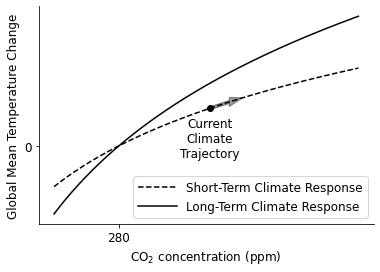

In [6]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
#plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
#plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

#plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

#plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
#plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

#plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic_annimated_1.png',dpi=300)#, bbox_inches='tight')

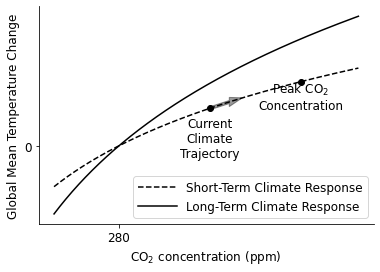

In [7]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
#plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

#plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
#plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

#plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic_annimated_2.png',dpi=300)#, bbox_inches='tight')

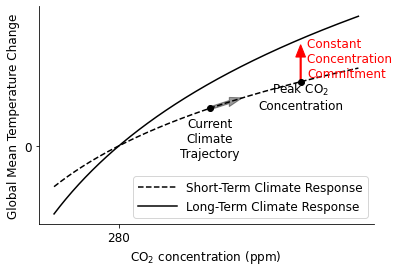

In [8]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
#plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
#plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
#plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

#plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic_annimated_3.png',dpi=300)#, bbox_inches='tight')

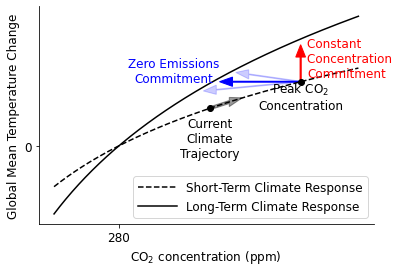

In [9]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Short-Term Climate Response')
temp2.plot(color='black', linestyle='solid', label='Long-Term Climate Response')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
plt.text(560,temp1[twoxco2]-0.84, 'Peak CO$_2$\nConcentration', ha='center',wrap=True)

plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current\nClimate\nTrajectory',wrap=True, ha='center', va='top')

plt.text(570,temp1[twoxco2]+1.45, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
plt.text(365,temp1[twoxco2]+0.35, 'Zero Emissions\nCommitment',wrap=True, ha='center', va='center', color='blue')

#plt.text(370,-4.4, 'Koven (2023), doi:10.5281/zenodo.7953689', fontsize='small')

ax.spines[['right', 'top']].set_visible(False)

plt.legend(loc='lower right', handlelength=3.2)

plt.show()

fig.savefig('zec_schematic_annimated_4.png',dpi=300)#, bbox_inches='tight')